In [1]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, precision_score, roc_curve, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer

In [53]:
import pandas as pd

import seaborn as sns

import matplotlib

import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

## Cost Function

In [3]:

def cost(truth, preds):
    precision = precision_score(truth, preds)
    recall = recall_score(truth, preds)
    # square beta
    beta2 = 2.5**2
    f_mesure = ((1+beta2)*precision*recall)/(beta2*(precision+recall))
    return f_mesure

custom_scorer = make_scorer(cost, greater_is_better=False)


## Descriptive Data for Dashboard

In [26]:
data_init = pd.read_csv('application_train.csv')
data_init

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
bureau_counts = pd.read_csv('bureau_counts.csv')
bureau_counts.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
0,100001,3,0.428571,0,0.0,4,0.571429,0,0.0,1.0,...,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0
1,100002,2,0.250000,0,0.0,6,0.750000,0,0.0,1.0,...,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0
2,100003,1,0.250000,0,0.0,3,0.750000,0,0.0,1.0,...,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0
3,100004,0,0.000000,0,0.0,2,1.000000,0,0.0,1.0,...,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0
4,100005,2,0.666667,0,0.0,1,0.333333,0,0.0,1.0,...,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0


In [28]:
bureau_agg = pd.read_csv('bureau_agg.csv')
bureau_agg.head()

,Unnamed: 0,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min
0,0,100001,7,-735.000000,-49,-1572,-5145,0.0,0,0,...,0.0,0.0,0.0,-93.142857,-6,-155,7,3545.357143,10822.5,0.0
1,1,100002,8,-874.000000,-103,-1437,-6992,0.0,0,0,...,0.0,0.0,0.0,-499.875000,-7,-1185,7,0.000000,0.0,0.0
2,2,100003,4,-1400.750000,-606,-2586,-5603,0.0,0,0,...,0.0,0.0,0.0,-816.000000,-43,-2131,0,NaN,NaN,NaN
3,3,100004,2,-867.000000,-408,-1326,-1734,0.0,0,0,...,0.0,0.0,0.0,-532.000000,-382,-682,0,NaN,NaN,NaN
4,4,100005,3,-190.666667,-62,-373,-572,0.0,0,0,...,0.0,0.0,0.0,-54.333333,-11,-121,3,1420.500000,4261.5,0.0


In [29]:
bureau_balance_by_client = pd.read_csv('bureau_balance_by_client.csv')
bureau_balance_by_client.head()

,Unnamed: 0,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,client_bureau_balance_MONTHS_BALANCE_mean_sum,client_bureau_balance_MONTHS_BALANCE_max_mean,...,client_bureau_balance_STATUS_5_count_min,client_bureau_balance_STATUS_C_count_mean,client_bureau_balance_STATUS_C_count_min,client_bureau_balance_STATUS_C_count_norm_max,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min
0,0,100001,7,24.571429,2.0,-11.785714,-0.5,-25.5,-82.5,0.0,...,0.0,15.714286,0.0,0.966667,4.285714,9.0,0.0,0.214590,0.500000,0.0
1,1,100002,8,13.750000,4.0,-21.875000,-1.5,-39.5,-175.0,-15.5,...,0.0,2.875000,0.0,0.812500,1.875000,3.0,0.0,0.161932,0.500000,0.0
2,2,100003,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100004,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100005,3,7.000000,3.0,-3.000000,-1.0,-6.0,-9.0,0.0,...,0.0,1.666667,0.0,0.384615,0.666667,1.0,0.0,0.136752,0.333333,0.0


In [30]:
previous_counts = pd.read_csv('previous_counts.csv')
previous_counts.head()

,SK_ID_CURR,previous_NAME_CONTRACT_TYPE_Cash loans_count,previous_NAME_CONTRACT_TYPE_Cash loans_count_norm,previous_NAME_CONTRACT_TYPE_Consumer loans_count,previous_NAME_CONTRACT_TYPE_Consumer loans_count_norm,previous_NAME_CONTRACT_TYPE_Revolving loans_count,previous_NAME_CONTRACT_TYPE_Revolving loans_count_norm,previous_NAME_CONTRACT_TYPE_XNA_count,previous_WEEKDAY_APPR_PROCESS_START_FRIDAY_count,previous_WEEKDAY_APPR_PROCESS_START_FRIDAY_count_norm,...,previous_PRODUCT_COMBINATION_POS industry with interest_count,previous_PRODUCT_COMBINATION_POS industry with interest_count_norm,previous_PRODUCT_COMBINATION_POS industry without interest_count,previous_PRODUCT_COMBINATION_POS industry without interest_count_norm,previous_PRODUCT_COMBINATION_POS mobile without interest_count,previous_PRODUCT_COMBINATION_POS mobile without interest_count_norm,previous_PRODUCT_COMBINATION_POS other with interest_count,previous_PRODUCT_COMBINATION_POS other with interest_count_norm,previous_PRODUCT_COMBINATION_POS others without interest_count,previous_PRODUCT_COMBINATION_POS others without interest_count_norm
0,100001,0,0.000000,1,1.000000,0,0.0,0,1,1.000000,...,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,0,0.000000,1,1.000000,0,0.0,0,0,0.000000,...,0,0.000000,0,0.0,0,0.0,1,1.0,0,0.0
2,100003,1,0.333333,2,0.666667,0,0.0,0,1,0.333333,...,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,0,0.000000,1,1.000000,0,0.0,0,1,1.000000,...,0,0.000000,0,0.0,1,1.0,0,0.0,0,0.0
4,100005,1,0.500000,1,0.500000,0,0.0,0,1,0.500000,...,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0


In [34]:
previous_agg = pd.read_csv('previous_agg.csv')
previous_agg.head()

,Unnamed: 0,SK_ID_CURR,previous_AMT_ANNUITY_count,previous_AMT_ANNUITY_mean,previous_AMT_ANNUITY_min,previous_AMT_ANNUITY_sum,previous_AMT_APPLICATION_mean,previous_AMT_APPLICATION_min,previous_AMT_DOWN_PAYMENT_count,previous_AMT_DOWN_PAYMENT_mean,...,previous_DAYS_FIRST_DUE_mean,previous_DAYS_FIRST_DUE_min,previous_DAYS_LAST_DUE_1ST_VERSION_mean,previous_DAYS_LAST_DUE_1ST_VERSION_min,previous_DAYS_LAST_DUE_mean,previous_DAYS_LAST_DUE_max,previous_DAYS_LAST_DUE_min,previous_NFLAG_INSURED_ON_APPROVAL_mean,previous_NFLAG_INSURED_ON_APPROVAL_min,previous_NFLAG_INSURED_ON_APPROVAL_sum
0,0,100001,1,3951.000,3951.000,3951.000,24835.50,24835.5,1,2520.0,...,-1709.000000,-1709.0,-1499.000000,-1499.0,-1619.000000,-1619.0,-1619.0,0.000000,0.0,0.0
1,1,100002,1,9251.775,9251.775,9251.775,179055.00,179055.0,1,0.0,...,-565.000000,-565.0,125.000000,125.0,-25.000000,-25.0,-25.0,0.000000,0.0,0.0
2,2,100003,3,56553.990,6737.310,169661.970,435436.50,68809.5,2,3442.5,...,-1274.333333,-2310.0,-1004.333333,-1980.0,-1054.333333,-536.0,-1980.0,0.666667,0.0,2.0
3,3,100004,1,5357.250,5357.250,5357.250,24282.00,24282.0,1,4860.0,...,-784.000000,-784.0,-694.000000,-694.0,-724.000000,-724.0,-724.0,0.000000,0.0,0.0
4,4,100005,1,4813.200,4813.200,4813.200,22308.75,0.0,1,4464.0,...,-706.000000,-706.0,-376.000000,-376.0,-466.000000,-466.0,-466.0,0.000000,0.0,0.0


In [31]:
cash_by_client = pd.read_csv('cash_by_client.csv')
cash_by_client.head()

,Unnamed: 0,SK_ID_CURR,client_cash_MONTHS_BALANCE_count_count,client_cash_MONTHS_BALANCE_count_mean,client_cash_MONTHS_BALANCE_count_min,client_cash_MONTHS_BALANCE_mean_mean,client_cash_MONTHS_BALANCE_mean_max,client_cash_MONTHS_BALANCE_mean_sum,client_cash_MONTHS_BALANCE_sum_mean,client_cash_MONTHS_BALANCE_sum_max,...,client_cash_CNT_INSTALMENT_FUTURE_min_mean,client_cash_CNT_INSTALMENT_FUTURE_min_min,client_cash_SK_DPD_mean_mean,client_cash_SK_DPD_mean_min,client_cash_SK_DPD_min_mean,client_cash_SK_DPD_min_min,client_cash_SK_DPD_DEF_mean_mean,client_cash_SK_DPD_DEF_mean_min,client_cash_SK_DPD_DEF_min_mean,client_cash_SK_DPD_DEF_min_min
0,0,100001,9,4.555556,4,-72.555556,-55.0,-653.0,-320.777778,-275,...,0.000000,0.0,0.777778,0.0,0.0,0,0.777778,0.0,0.0,0
1,1,100002,19,19.000000,19,-10.000000,-10.0,-190.0,-190.000000,-190,...,6.000000,6.0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0
2,2,100003,28,9.714286,8,-43.785714,-21.5,-1226.0,-472.857143,-172,...,0.428571,0.0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0
3,3,100004,4,4.000000,4,-25.500000,-25.5,-102.0,-102.000000,-102,...,0.000000,0.0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0
4,4,100005,11,11.000000,11,-20.000000,-20.0,-220.0,-220.000000,-220,...,0.000000,0.0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0


In [32]:
credit_by_client = pd.read_csv('credit_by_client.csv')
credit_by_client.head()

,Unnamed: 0,SK_ID_CURR,client_credit_MONTHS_BALANCE_count_count,client_credit_MONTHS_BALANCE_mean_mean,client_credit_MONTHS_BALANCE_max_mean,client_credit_AMT_BALANCE_mean_mean,client_credit_AMT_BALANCE_mean_sum,client_credit_AMT_BALANCE_min_mean,client_credit_AMT_BALANCE_min_sum,client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean,...,client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_mean,client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_sum,client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_mean,client_credit_CNT_DRAWINGS_POS_CURRENT_max_sum,client_credit_CNT_DRAWINGS_POS_CURRENT_min_mean,client_credit_CNT_DRAWINGS_POS_CURRENT_min_sum,client_credit_CNT_INSTALMENT_MATURE_CUM_min_mean,client_credit_SK_DPD_mean_mean,client_credit_SK_DPD_min_mean,client_credit_SK_DPD_DEF_mean_mean
0,0,100006,6,-3.5,-1,0.000000,0.000,0.0,0.0,270000.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.000000,0,0.000000
1,1,100011,74,-38.5,-2,54482.111149,4031676.225,0.0,0.0,164189.189189,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.000000
2,2,100013,96,-48.5,-1,18159.919219,1743352.245,0.0,0.0,131718.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.010417,0,0.010417
3,3,100021,17,-10.0,-2,0.000000,0.000,0.0,0.0,675000.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.000000,0,0.000000
4,4,100023,8,-7.5,-4,0.000000,0.000,0.0,0.0,135000.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.000000,0,0.000000


In [33]:
installments_by_client = pd.read_csv('installments_by_client.csv')
installments_by_client.head()

,Unnamed: 0,SK_ID_CURR,client_installments_NUM_INSTALMENT_VERSION_count_count,client_installments_NUM_INSTALMENT_VERSION_count_mean,client_installments_NUM_INSTALMENT_VERSION_count_min,client_installments_NUM_INSTALMENT_VERSION_mean_mean,client_installments_NUM_INSTALMENT_VERSION_mean_max,client_installments_NUM_INSTALMENT_VERSION_mean_min,client_installments_NUM_INSTALMENT_VERSION_mean_sum,client_installments_NUM_INSTALMENT_VERSION_min_mean,...,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_mean,client_installments_AMT_INSTALMENT_max_max,client_installments_AMT_INSTALMENT_max_min,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_INSTALMENT_min_mean,client_installments_AMT_INSTALMENT_sum_mean,client_installments_AMT_INSTALMENT_sum_min,client_installments_AMT_INSTALMENT_sum_sum,client_installments_AMT_PAYMENT_min_sum
0,0,100001,7,3.571429,3,1.142857,1.250000,1.000000,8.0,1.0,...,41195.925,11648.2500,17397.900,3982.050,81537.750,3963.8250,21834.096429,11945.025,1.528387e+05,27746.775
1,1,100002,19,19.000000,19,1.052632,1.052632,1.052632,20.0,1.0,...,219625.695,53093.7450,53093.745,53093.745,1008781.155,9251.7750,219625.695000,219625.695,4.172888e+06,175783.725
2,2,100003,25,9.160000,6,1.040000,1.142857,1.000000,26.0,1.0,...,1618864.650,175764.0492,560835.360,6737.310,4394101.230,46164.3318,453952.220400,80773.380,1.134881e+07,1154108.295
3,3,100004,3,3.000000,3,1.333333,1.333333,1.333333,4.0,1.0,...,21288.465,10573.9650,10573.965,10573.965,31721.895,5357.2500,21288.465000,21288.465,6.386539e+04,16071.750
4,4,100005,9,9.000000,9,1.111111,1.111111,1.111111,10.0,1.0,...,56161.845,17656.2450,17656.245,17656.245,158906.205,4813.2000,56161.845000,56161.845,5.054566e+05,43318.800


## Model Data for Dashboard

In [4]:
model = pickle.load(open('model_lr.sav', 'rb'))
data = pd.read_csv('data_model_red.csv', index_col='index')
data_stat = pd.read_csv('data_dashboard.csv', index_col='SK_ID_CURR')


## We observe the object vectors from app_train

In [5]:
data_dashboard = pd.read_csv('data_dashboard.csv', index_col='SK_ID_CURR')

In [6]:
data_dashboard = pd.read_csv('data_dashboard.csv', index_col='SK_ID_CURR')

In [7]:
data_dashboard

,Unnamed: 0,CODE_GENDER,DAYS_BIRTH,EMERGENCYSTATE_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,...,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,M,9461,No,0.083037,0.262949,0.139376,N,Y,reg oper account,...,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,"Stone, brick",WEDNESDAY
100003,1,F,16765,No,0.311267,0.622246,NaN,N,N,reg oper account,...,Cash loans,Higher education,Married,House / apartment,State servant,Family,Core staff,School,Block,MONDAY
100004,2,M,19046,NaN,NaN,0.555912,0.729567,Y,Y,NaN,...,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Government,NaN,MONDAY
100006,3,F,19005,NaN,NaN,0.650442,NaN,N,Y,NaN,...,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,NaN,WEDNESDAY
100007,4,M,19932,NaN,NaN,0.322738,NaN,N,Y,NaN,...,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Core staff,Religion,NaN,THURSDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,307506,M,9327,No,0.145570,0.681632,NaN,N,N,reg oper account,...,Cash loans,Secondary / secondary special,Separated,With parents,Working,Unaccompanied,Sales staff,Services,"Stone, brick",THURSDAY
456252,307507,F,20775,No,NaN,0.115992,NaN,N,Y,reg oper account,...,Cash loans,Secondary / secondary special,Widow,House / apartment,Pensioner,Unaccompanied,NaN,XNA,"Stone, brick",MONDAY
456253,307508,F,14966,No,0.744026,0.535722,0.218859,N,Y,reg oper account,...,Cash loans,Higher education,Separated,House / apartment,Working,Unaccompanied,Managers,School,Panel,THURSDAY


In [8]:
data_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  307511 non-null  int64  
 1   CODE_GENDER                 307511 non-null  object 
 2   DAYS_BIRTH                  307511 non-null  int64  
 3   EMERGENCYSTATE_MODE         161756 non-null  object 
 4   EXT_SOURCE_1                134133 non-null  float64
 5   EXT_SOURCE_2                306851 non-null  float64
 6   EXT_SOURCE_3                246546 non-null  float64
 7   FLAG_OWN_CAR                307511 non-null  object 
 8   FLAG_OWN_REALTY             307511 non-null  object 
 9   FONDKAPREMONT_MODE          97216 non-null   object 
 10  HOUSETYPE_MODE              153214 non-null  object 
 11  NAME_CONTRACT_TYPE          307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMI

<AxesSubplot:>

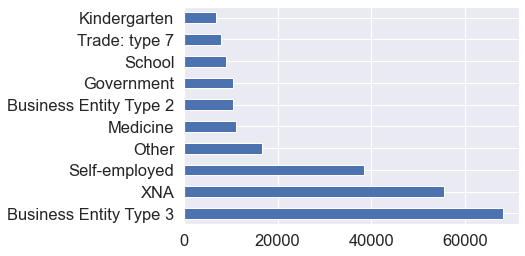

In [25]:
data_dashboard['ORGANIZATION_TYPE'].value_counts()[:10].plot(kind="barh")

<AxesSubplot:>

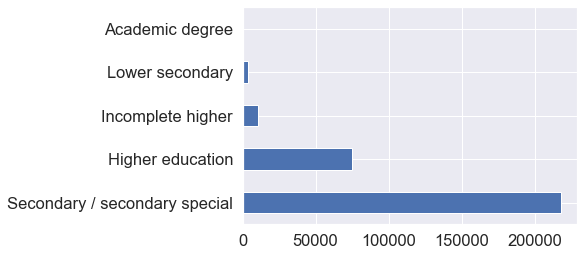

In [24]:
data_dashboard['NAME_EDUCATION_TYPE'].value_counts()[:10].plot(kind="barh")

<AxesSubplot:>

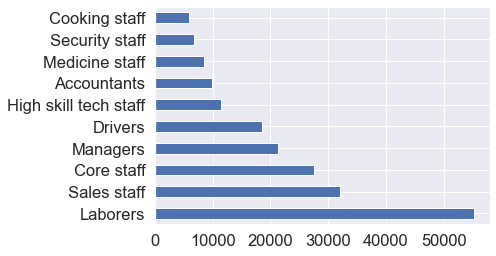

In [22]:
data_dashboard['OCCUPATION_TYPE'].value_counts()[:10].plot(kind="barh")

In [9]:
preds= model.predict_proba(data.values)[:,0]

In [10]:
preds

array([0.52483906, 0.99118781, 0.97115004, ..., 0.94938254, 0.92924838,
       0.92346411])

In [124]:
data_dashboard['proba'] = preds

<AxesSubplot:>

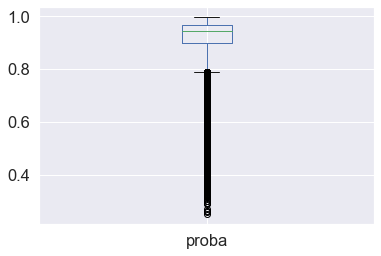

In [12]:
data_dashboard['proba'].plot(kind='box')

## Stats  for Age

In [13]:
data_dashboard['AGE'] = round(data_dashboard['DAYS_BIRTH'] / 365)

In [14]:
data_dashboard['AGE_GROUP'] = pd.qcut(data_dashboard['AGE'], 10)

In [15]:
stats = pd.DataFrame(data_dashboard.groupby(['AGE_GROUP'])['proba'].describe())

In [16]:
stats

,count,mean,std,min,25%,50%,75%,max
AGE_GROUP,,,,,,,,
"(20.999, 28.0]",33457.0,0.865700,0.101436,0.261960,0.820854,0.895177,0.939506,0.996450
"(28.0, 32.0]",31746.0,0.895209,0.088447,0.249510,0.863914,0.922677,0.956571,0.997520
"(32.0, 36.0]",31291.0,0.907666,0.080545,0.313906,0.880153,0.932990,0.962661,0.996491
"(36.0, 39.0]",26543.0,0.917119,0.074557,0.294492,0.894177,0.940593,0.966328,0.997653
"(39.0, 43.0]",33670.0,0.924236,0.068891,0.260631,0.904566,0.946112,0.968832,0.997967
"(43.0, 47.0]",30052.0,0.925114,0.067328,0.351866,0.906067,0.946023,0.968656,0.997243
"(47.0, 52.0]",33546.0,0.928843,0.064519,0.270487,0.911418,0.948937,0.970091,0.997501
"(52.0, 56.0]",28410.0,0.936384,0.057361,0.288989,0.920585,0.954154,0.973192,0.997452
"(56.0, 61.0]",32183.0,0.944331,0.049379,0.390364,0.930641,0.959379,0.975615,0.997549


In [17]:
result = []
for idx, row in stats.iterrows():
    item = {
        'x': str(row.name),
        'low': f"{row['min']*100:.4}",
        'q1': f"{row['25%']*100:.4}",
        'median': f"{row['50%']*100:.4}",
        'q3': f"{row['75%']*100:.4}",
        'high': f"{row['max']*100:.4}"    
    }
    result.append(item)

In [18]:
result

[{'x': '(20.999, 28.0]',
  'low': '26.2',
  'q1': '82.09',
  'median': '89.52',
  'q3': '93.95',
  'high': '99.65'},
 {'x': '(28.0, 32.0]',
  'low': '24.95',
  'q1': '86.39',
  'median': '92.27',
  'q3': '95.66',
  'high': '99.75'},
 {'x': '(32.0, 36.0]',
  'low': '31.39',
  'q1': '88.02',
  'median': '93.3',
  'q3': '96.27',
  'high': '99.65'},
 {'x': '(36.0, 39.0]',
  'low': '29.45',
  'q1': '89.42',
  'median': '94.06',
  'q3': '96.63',
  'high': '99.77'},
 {'x': '(39.0, 43.0]',
  'low': '26.06',
  'q1': '90.46',
  'median': '94.61',
  'q3': '96.88',
  'high': '99.8'},
 {'x': '(43.0, 47.0]',
  'low': '35.19',
  'q1': '90.61',
  'median': '94.6',
  'q3': '96.87',
  'high': '99.72'},
 {'x': '(47.0, 52.0]',
  'low': '27.05',
  'q1': '91.14',
  'median': '94.89',
  'q3': '97.01',
  'high': '99.75'},
 {'x': '(52.0, 56.0]',
  'low': '28.9',
  'q1': '92.06',
  'median': '95.42',
  'q3': '97.32',
  'high': '99.75'},
 {'x': '(56.0, 61.0]',
  'low': '39.04',
  'q1': '93.06',
  'median': '95.9

## Stats for Extension 1

In [125]:
data_dashboard['EXT1_GROUP'] = pd.qcut(data_dashboard['EXT_SOURCE_1'], 10)
stats_ext1 = pd.DataFrame(data_dashboard.groupby(['EXT1_GROUP'])['proba'].describe())
stats_ext1

,count,mean,std,min,25%,50%,75%,max
EXT1_GROUP,,,,,,,,
"(0.013600000000000001, 0.213]",13414.0,0.843417,0.109402,0.259138,0.789444,0.873982,0.924808,0.991905
"(0.213, 0.296]",13413.0,0.879995,0.090718,0.249510,0.842787,0.906875,0.944819,0.995123
"(0.296, 0.369]",13414.0,0.899691,0.078422,0.316663,0.870528,0.923172,0.953535,0.995199
"(0.369, 0.438]",13412.0,0.910004,0.074080,0.392554,0.884937,0.932787,0.959981,0.995948
"(0.438, 0.506]",13415.0,0.922094,0.064837,0.421748,0.902490,0.941169,0.965236,0.995844
"(0.506, 0.573]",13412.0,0.929817,0.059922,0.423847,0.913226,0.947536,0.968895,0.996989
"(0.573, 0.64]",13413.0,0.937940,0.053767,0.451471,0.922474,0.954522,0.972396,0.996455
"(0.64, 0.71]",13413.0,0.945609,0.047912,0.424071,0.932944,0.960139,0.975641,0.997217
"(0.71, 0.787]",13413.0,0.953023,0.042033,0.411667,0.942142,0.965380,0.979001,0.998271


In [126]:
result_ext1 = []
for idx, row in stats_ext1.iterrows():
    item = {
        'x': str(row.name),
        'low': f"{row['min']*100:.4}",
        'q1': f"{row['25%']*100:.4}",
        'median': f"{row['50%']*100:.4}",
        'q3': f"{row['75%']*100:.4}",
        'high': f"{row['max']*100:.4}"    
    }
    result_ext1.append(item)

In [127]:
result_ext1

[{'x': '(0.013600000000000001, 0.213]',
  'low': '25.91',
  'q1': '78.94',
  'median': '87.4',
  'q3': '92.48',
  'high': '99.19'},
 {'x': '(0.213, 0.296]',
  'low': '24.95',
  'q1': '84.28',
  'median': '90.69',
  'q3': '94.48',
  'high': '99.51'},
 {'x': '(0.296, 0.369]',
  'low': '31.67',
  'q1': '87.05',
  'median': '92.32',
  'q3': '95.35',
  'high': '99.52'},
 {'x': '(0.369, 0.438]',
  'low': '39.26',
  'q1': '88.49',
  'median': '93.28',
  'q3': '96.0',
  'high': '99.59'},
 {'x': '(0.438, 0.506]',
  'low': '42.17',
  'q1': '90.25',
  'median': '94.12',
  'q3': '96.52',
  'high': '99.58'},
 {'x': '(0.506, 0.573]',
  'low': '42.38',
  'q1': '91.32',
  'median': '94.75',
  'q3': '96.89',
  'high': '99.7'},
 {'x': '(0.573, 0.64]',
  'low': '45.15',
  'q1': '92.25',
  'median': '95.45',
  'q3': '97.24',
  'high': '99.65'},
 {'x': '(0.64, 0.71]',
  'low': '42.41',
  'q1': '93.29',
  'median': '96.01',
  'q3': '97.56',
  'high': '99.72'},
 {'x': '(0.71, 0.787]',
  'low': '41.17',
  'q1

## Stats for Extension 1

In [128]:
data_dashboard['EXT2_GROUP'] = pd.qcut(data_dashboard['EXT_SOURCE_2'], 10)
stats_ext2 = pd.DataFrame(data_dashboard.groupby(['EXT2_GROUP'])['proba'].describe())
stats_ext2

,count,mean,std,min,25%,50%,75%,max
EXT2_GROUP,,,,,,,,
"(-0.0009999183, 0.216]",30686.0,0.818252,0.114797,0.249510,0.759542,0.846505,0.905389,0.990841
"(0.216, 0.34]",30685.0,0.874378,0.084731,0.306085,0.836935,0.897410,0.935483,0.994296
"(0.34, 0.44]",30687.0,0.896883,0.071760,0.394830,0.867085,0.917020,0.947855,0.993380
"(0.44, 0.512]",30684.0,0.915860,0.060899,0.430797,0.892542,0.933255,0.957946,0.996293
"(0.512, 0.566]",30684.0,0.928126,0.052303,0.536361,0.908272,0.942858,0.964039,0.995521
"(0.566, 0.608]",30687.0,0.936846,0.047810,0.524745,0.920412,0.950770,0.968866,0.997472
"(0.608, 0.646]",30683.0,0.943917,0.043482,0.516678,0.929759,0.956516,0.972756,0.996387
"(0.646, 0.682]",30694.0,0.951047,0.038080,0.578061,0.938700,0.961857,0.976086,0.996899
"(0.682, 0.722]",30676.0,0.956990,0.034590,0.567632,0.946468,0.967003,0.979240,0.997549


In [131]:
result_ext2 = []
for idx, row in stats_ext2.iterrows():
    item = {
        'x': str(row.name),
        'low': f"{row['min']*100:.4}",
        'q1': f"{row['25%']*100:.4}",
        'median': f"{row['50%']*100:.4}",
        'q3': f"{row['75%']*100:.4}",
        'high': f"{row['max']*100:.4}"    
    }
    result_ext2.append(item)

In [132]:
result_ext2

[{'x': '(-0.0009999183, 0.216]',
  'low': '24.95',
  'q1': '75.95',
  'median': '84.65',
  'q3': '90.54',
  'high': '99.08'},
 {'x': '(0.216, 0.34]',
  'low': '30.61',
  'q1': '83.69',
  'median': '89.74',
  'q3': '93.55',
  'high': '99.43'},
 {'x': '(0.34, 0.44]',
  'low': '39.48',
  'q1': '86.71',
  'median': '91.7',
  'q3': '94.79',
  'high': '99.34'},
 {'x': '(0.44, 0.512]',
  'low': '43.08',
  'q1': '89.25',
  'median': '93.33',
  'q3': '95.79',
  'high': '99.63'},
 {'x': '(0.512, 0.566]',
  'low': '53.64',
  'q1': '90.83',
  'median': '94.29',
  'q3': '96.4',
  'high': '99.55'},
 {'x': '(0.566, 0.608]',
  'low': '52.47',
  'q1': '92.04',
  'median': '95.08',
  'q3': '96.89',
  'high': '99.75'},
 {'x': '(0.608, 0.646]',
  'low': '51.67',
  'q1': '92.98',
  'median': '95.65',
  'q3': '97.28',
  'high': '99.64'},
 {'x': '(0.646, 0.682]',
  'low': '57.81',
  'q1': '93.87',
  'median': '96.19',
  'q3': '97.61',
  'high': '99.69'},
 {'x': '(0.682, 0.722]',
  'low': '56.76',
  'q1': '94

## Stats of EXT 3

In [133]:
data_dashboard['EXT3_GROUP'] = pd.qcut(data_dashboard['EXT_SOURCE_3'], 10)
stats_ext3 = pd.DataFrame(data_dashboard.groupby(['EXT3_GROUP'])['proba'].describe())
stats_ext3

,count,mean,std,min,25%,50%,75%,max
EXT3_GROUP,,,,,,,,
"(-0.000473, 0.228]",24701.0,0.809713,0.117103,0.249510,0.749194,0.837853,0.898163,0.987368
"(0.228, 0.33]",24744.0,0.864389,0.090482,0.354917,0.822494,0.888894,0.930339,0.991750
"(0.33, 0.408]",25057.0,0.893851,0.074933,0.316663,0.863050,0.915480,0.946392,0.993216
"(0.408, 0.476]",24689.0,0.913712,0.062600,0.418962,0.890330,0.931592,0.956743,0.996802
"(0.476, 0.535]",24186.0,0.927930,0.052930,0.494921,0.908524,0.942987,0.964001,0.996480
"(0.535, 0.592]",25392.0,0.939579,0.045278,0.525289,0.923876,0.952950,0.969881,0.996797
"(0.592, 0.643]",24725.0,0.948392,0.038346,0.624270,0.934912,0.959367,0.974201,0.997452
"(0.643, 0.694]",24745.0,0.955468,0.033429,0.563430,0.944267,0.964992,0.977448,0.997967
"(0.694, 0.749]",23675.0,0.962474,0.028310,0.707474,0.953232,0.970343,0.981170,0.997726


In [134]:
result_ext3 = []
for idx, row in stats_ext3.iterrows():
    item = {
        'x': str(row.name),
        'low': f"{row['min']*100:.4}",
        'q1': f"{row['25%']*100:.4}",
        'median': f"{row['50%']*100:.4}",
        'q3': f"{row['75%']*100:.4}",
        'high': f"{row['max']*100:.4}"    
    }
    result_ext3.append(item)

In [135]:
result_ext3

[{'x': '(-0.000473, 0.228]',
  'low': '24.95',
  'q1': '74.92',
  'median': '83.79',
  'q3': '89.82',
  'high': '98.74'},
 {'x': '(0.228, 0.33]',
  'low': '35.49',
  'q1': '82.25',
  'median': '88.89',
  'q3': '93.03',
  'high': '99.18'},
 {'x': '(0.33, 0.408]',
  'low': '31.67',
  'q1': '86.3',
  'median': '91.55',
  'q3': '94.64',
  'high': '99.32'},
 {'x': '(0.408, 0.476]',
  'low': '41.9',
  'q1': '89.03',
  'median': '93.16',
  'q3': '95.67',
  'high': '99.68'},
 {'x': '(0.476, 0.535]',
  'low': '49.49',
  'q1': '90.85',
  'median': '94.3',
  'q3': '96.4',
  'high': '99.65'},
 {'x': '(0.535, 0.592]',
  'low': '52.53',
  'q1': '92.39',
  'median': '95.29',
  'q3': '96.99',
  'high': '99.68'},
 {'x': '(0.592, 0.643]',
  'low': '62.43',
  'q1': '93.49',
  'median': '95.94',
  'q3': '97.42',
  'high': '99.75'},
 {'x': '(0.643, 0.694]',
  'low': '56.34',
  'q1': '94.43',
  'median': '96.5',
  'q3': '97.74',
  'high': '99.8'},
 {'x': '(0.694, 0.749]',
  'low': '70.75',
  'q1': '95.32',


## Installements file

In [19]:
installments = pd.read_csv('installments_payments.csv')
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


<AxesSubplot:>

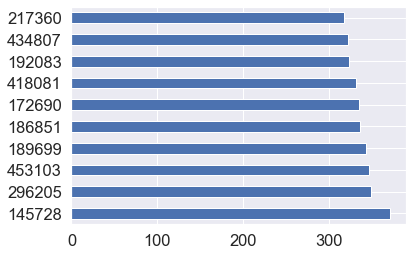

In [111]:
installments['SK_ID_CURR'].value_counts()[:10].plot(kind="barh")

In [113]:
installments['SK_ID_CURR'].value_counts()[:10]

145728    372
296205    350
453103    347
189699    344
186851    337
172690    336
418081    332
192083    324
434807    323
217360    318
Name: SK_ID_CURR, dtype: int64

## Datadashboard2

In [38]:
data_dashboard2 = pd.read_csv('data_dashboard.csv')
data_dashboard2['SK_ID_CURR']=data_init['SK_ID_CURR']
data_dashboard2.head()

,Unnamed: 0,CODE_GENDER,DAYS_BIRTH,EMERGENCYSTATE_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
0,0,M,9461,No,0.083037,0.262949,0.139376,N,Y,reg oper account,...,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,100002,"Stone, brick",WEDNESDAY
1,1,F,16765,No,0.311267,0.622246,NaN,N,N,reg oper account,...,Higher education,Married,House / apartment,State servant,Family,Core staff,School,100003,Block,MONDAY
2,2,M,19046,NaN,NaN,0.555912,0.729567,Y,Y,NaN,...,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Government,100004,NaN,MONDAY
3,3,F,19005,NaN,NaN,0.650442,NaN,N,Y,NaN,...,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,100006,NaN,WEDNESDAY
4,4,M,19932,NaN,NaN,0.322738,NaN,N,Y,NaN,...,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Core staff,Religion,100007,NaN,THURSDAY


In [39]:
# Merge with the value counts of bureau
data_dashboard2 = data_dashboard2.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
data_dashboard2 = data_dashboard2.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
data_dashboard2 = data_dashboard2.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

# Merge with the value counts of previous applications
data_dashboard2 = data_dashboard2.merge(previous_counts, on ='SK_ID_CURR', how = 'left')

# Merge with the stats of previous applications
data_dashboard2 = data_dashboard2.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Merge cash by client
data_dashboard2 = data_dashboard2.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

# Merge credit by client
data_dashboard2 = data_dashboard2.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

# Merge installements by client
data_dashboard2 = data_dashboard2.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

In [40]:
data_dashboard2.head()

,Unnamed: 0_x,CODE_GENDER,DAYS_BIRTH,EMERGENCYSTATE_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,...,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_mean,client_installments_AMT_INSTALMENT_max_max,client_installments_AMT_INSTALMENT_max_min,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_INSTALMENT_min_mean,client_installments_AMT_INSTALMENT_sum_mean,client_installments_AMT_INSTALMENT_sum_min,client_installments_AMT_INSTALMENT_sum_sum,client_installments_AMT_PAYMENT_min_sum
0,0,M,9461,No,0.083037,0.262949,0.139376,N,Y,reg oper account,...,219625.695,53093.745000,53093.745,53093.745,1008781.155,9251.775000,219625.695000,219625.695,4.172888e+06,175783.725
1,1,F,16765,No,0.311267,0.622246,NaN,N,N,reg oper account,...,1618864.650,175764.049200,560835.360,6737.310,4394101.230,46164.331800,453952.220400,80773.380,1.134881e+07,1154108.295
2,2,M,19046,NaN,NaN,0.555912,0.729567,Y,Y,NaN,...,21288.465,10573.965000,10573.965,10573.965,31721.895,5357.250000,21288.465000,21288.465,6.386539e+04,16071.750
3,3,F,19005,NaN,NaN,0.650442,NaN,N,Y,NaN,...,1007153.415,66116.269688,691786.890,15159.645,1057860.315,62154.793125,232499.719688,25091.325,3.719996e+06,994476.690
4,4,M,19932,NaN,NaN,0.322738,NaN,N,Y,NaN,...,835985.340,12677.324318,22678.785,1834.290,836703.405,12512.815909,178659.664091,18330.390,1.179154e+07,483756.390


In [41]:
selected_columns = data_dashboard2.select_dtypes('object').columns.union(['SK_ID_CURR','DAYS_BIRTH','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                                                                          'bureau_CREDIT_ACTIVE_Active_count','bureau_DAYS_CREDIT_count',
                                                                          'client_bureau_balance_MONTHS_BALANCE_count_count',
                                                                          'previous_NAME_CONTRACT_TYPE_Cash loans_count',
                                                                          'client_cash_MONTHS_BALANCE_count_count',
                                                                          'client_credit_MONTHS_BALANCE_count_count',
                                                                          'client_installments_NUM_INSTALMENT_VERSION_count_count'])

In [42]:
Datadashbooard_final = data_dashboard2[selected_columns]

In [44]:
Datadashbooard_final

,CODE_GENDER,DAYS_BIRTH,EMERGENCYSTATE_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,...,SK_ID_CURR,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,bureau_CREDIT_ACTIVE_Active_count,bureau_DAYS_CREDIT_count,client_bureau_balance_MONTHS_BALANCE_count_count,client_cash_MONTHS_BALANCE_count_count,client_credit_MONTHS_BALANCE_count_count,client_installments_NUM_INSTALMENT_VERSION_count_count,previous_NAME_CONTRACT_TYPE_Cash loans_count
0,M,9461,No,0.083037,0.262949,0.139376,N,Y,reg oper account,block of flats,...,100002,"Stone, brick",WEDNESDAY,2.0,8.0,8.0,19.0,NaN,19.0,0.0
1,F,16765,No,0.311267,0.622246,NaN,N,N,reg oper account,block of flats,...,100003,Block,MONDAY,1.0,4.0,0.0,28.0,NaN,25.0,1.0
2,M,19046,NaN,NaN,0.555912,0.729567,Y,Y,NaN,NaN,...,100004,NaN,MONDAY,0.0,2.0,0.0,4.0,NaN,3.0,0.0
3,F,19005,NaN,NaN,0.650442,NaN,N,Y,NaN,NaN,...,100006,NaN,WEDNESDAY,NaN,NaN,NaN,21.0,6.0,16.0,5.0
4,M,19932,NaN,NaN,0.322738,NaN,N,Y,NaN,NaN,...,100007,NaN,THURSDAY,0.0,1.0,0.0,66.0,NaN,66.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,M,9327,No,0.145570,0.681632,NaN,N,N,reg oper account,block of flats,...,456251,"Stone, brick",THURSDAY,NaN,NaN,NaN,9.0,NaN,7.0,0.0
307507,F,20775,No,NaN,0.115992,NaN,N,Y,reg oper account,block of flats,...,456252,"Stone, brick",MONDAY,NaN,NaN,NaN,7.0,NaN,6.0,0.0
307508,F,14966,No,0.744026,0.535722,0.218859,N,Y,reg oper account,block of flats,...,456253,Panel,THURSDAY,2.0,4.0,4.0,17.0,NaN,14.0,0.0
307509,F,11961,No,NaN,0.514163,0.661024,N,Y,NaN,block of flats,...,456254,"Stone, brick",WEDNESDAY,0.0,1.0,1.0,20.0,NaN,19.0,0.0


In [46]:
Datadashbooard_final['Probability'] = pd.DataFrame(preds)

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
## Imputing 'bureau_CREDIT_ACTIVE_Active_count'

imputer = SimpleImputer(strategy='median')
imputer.fit(np.array(Datadashbooard_final['bureau_CREDIT_ACTIVE_Active_count']).reshape(-1, 1))
Datadashbooard_final['bureau_CREDIT_ACTIVE_Active_count_imputed'] = imputer.transform(np.array(Datadashbooard_final['bureau_CREDIT_ACTIVE_Active_count']).reshape(-1, 1))

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [117]:
Datadashbooard_final.head()

,CODE_GENDER,DAYS_BIRTH,EMERGENCYSTATE_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,...,WEEKDAY_APPR_PROCESS_START,bureau_CREDIT_ACTIVE_Active_count,bureau_DAYS_CREDIT_count,client_bureau_balance_MONTHS_BALANCE_count_count,client_cash_MONTHS_BALANCE_count_count,client_credit_MONTHS_BALANCE_count_count,client_installments_NUM_INSTALMENT_VERSION_count_count,previous_NAME_CONTRACT_TYPE_Cash loans_count,Probability,bureau_CREDIT_ACTIVE_Active_count_imputed
0,M,9461,No,0.083037,0.262949,0.139376,N,Y,reg oper account,block of flats,...,WEDNESDAY,2.0,8.0,8.0,19.0,NaN,19.0,0.0,0.524839,2.0
1,F,16765,No,0.311267,0.622246,NaN,N,N,reg oper account,block of flats,...,MONDAY,1.0,4.0,0.0,28.0,NaN,25.0,1.0,0.991188,1.0
2,M,19046,NaN,NaN,0.555912,0.729567,Y,Y,NaN,NaN,...,MONDAY,0.0,2.0,0.0,4.0,NaN,3.0,0.0,0.971150,0.0
3,F,19005,NaN,NaN,0.650442,NaN,N,Y,NaN,NaN,...,WEDNESDAY,NaN,NaN,NaN,21.0,6.0,16.0,5.0,0.929370,2.0
4,M,19932,NaN,NaN,0.322738,NaN,N,Y,NaN,NaN,...,THURSDAY,0.0,1.0,0.0,66.0,NaN,66.0,4.0,0.920406,0.0


In [122]:
Datadashbooard_final['CODE_GENDER'].value_counts()[:10]

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [118]:
result = []
for idx, row in Datadashbooard_final.iterrows():
    x = row['Probability']
    y = row['bureau_CREDIT_ACTIVE_Active_count_imputed']
    result.append({'x' : x, 'value': y})

In [119]:
result

[{'x': 0.5248390565746075, 'value': 2.0},
 {'x': 0.9911878101482234, 'value': 1.0},
 {'x': 0.9711500376363578, 'value': 0.0},
 {'x': 0.9293704788153542, 'value': 2.0},
 {'x': 0.9204063695899811, 'value': 0.0},
 {'x': 0.9341488809526752, 'value': 1.0},
 {'x': 0.9893100641375806, 'value': 4.0},
 {'x': 0.9803532125318897, 'value': 1.0},
 {'x': 0.9425486257521439, 'value': 0.0},
 {'x': 0.9557543775748428, 'value': 2.0},
 {'x': 0.9507565136199306, 'value': 2.0},
 {'x': 0.9781696916274265, 'value': 0.0},
 {'x': 0.92432150524635, 'value': 4.0},
 {'x': 0.9681356480141399, 'value': 0.0},
 {'x': 0.9685525572887723, 'value': 2.0},
 {'x': 0.8446305818778544, 'value': 2.0},
 {'x': 0.5569252576055708, 'value': 2.0},
 {'x': 0.977380911218064, 'value': 2.0},
 {'x': 0.958754447752558, 'value': 2.0},
 {'x': 0.9693900946818579, 'value': 4.0},
 {'x': 0.9080429575406797, 'value': 2.0},
 {'x': 0.8897901126454177, 'value': 1.0},
 {'x': 0.8361770093700014, 'value': 2.0},
 {'x': 0.9736539452368459, 'value': 1.

In [120]:
import json

with open('result.json', 'w') as jsonfile:
    json.dump(result, jsonfile)

In [106]:
with open("vector1.txt", "w") as output:
    output.write(str(result))

In [97]:
Datadashbooard_final.to_csv('Datadashbooard_final.csv')